# i Quit!!!
**An analysis on the affect of dissatisfaction on job resignation**

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 A Column by Any Other Name..wouldn't be that Column](#3)
- [4 Soak, Wash, Spin..Clean Data](#4)
- [5 Prepare to Combine...](#5)
- [6 Columns!...Combine!](#6)
- [7 Humans, Animals and Plants...All Categories](#7)
- [8 Ta..Daa!!](#8)
- [9 Conclusion](#9)

# 1

## Introduction

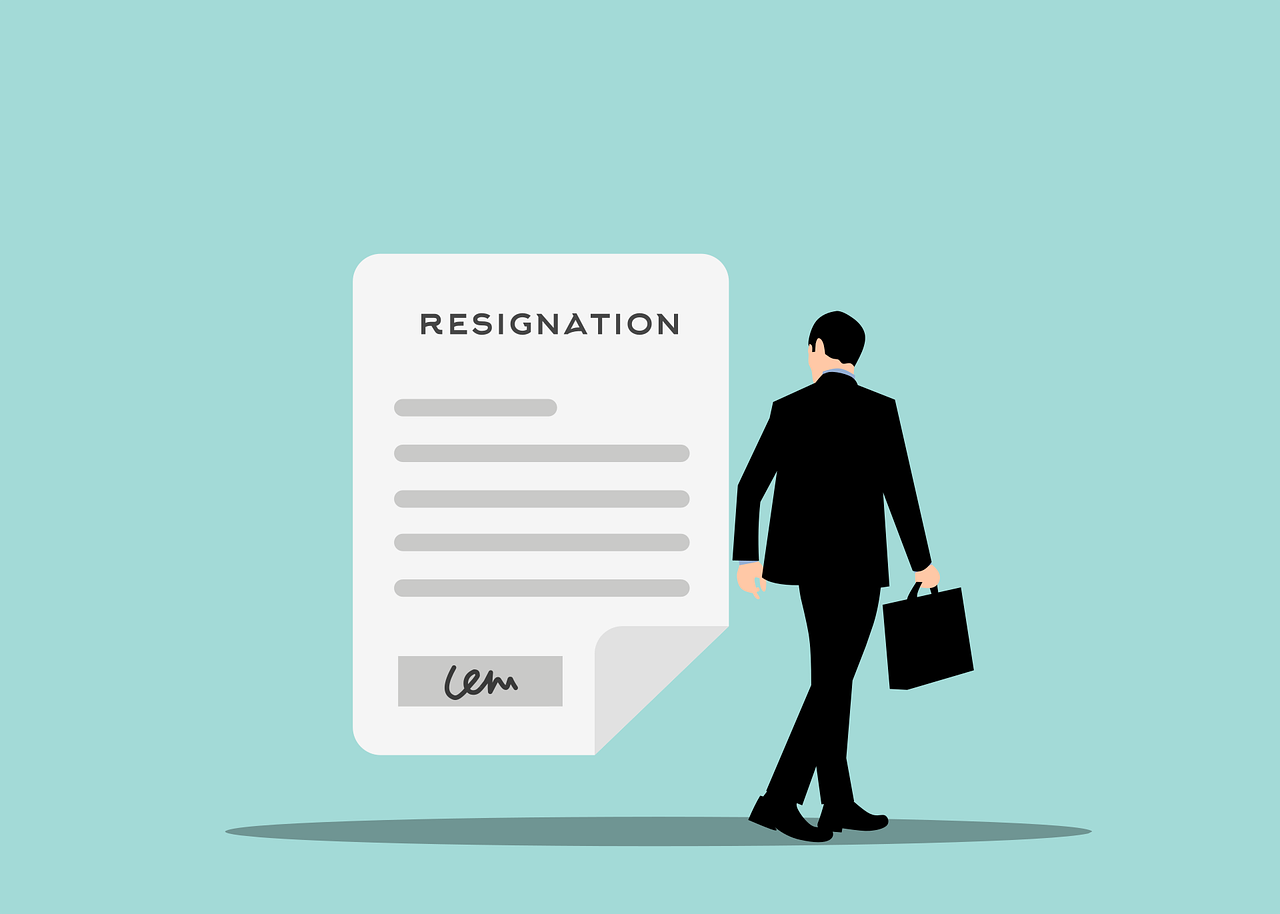
*Source*:[mohamed_hasan(pixabay)](https://pixabay.com/vectors/resignation-job-signature-quit-6784035/)

Employment in the old days was for a life time. You got in to an organization and you were a lifer. The thought of resigning was incomprehensible.

Today, that trend has flipped. There are just a handful of organization with a low employee turnover. If employees do stay they, eventually get laid off because of some cost cutting initiative. The reasons for leaving may be many. Some leave to improve themselves, others leave because they do not see any prospect for growth and still some others leave because of dissatisfaction.

In this project we shall look in to how much, dissatisfaction towards a job, becomes a factor that encourages employees to leave. The project aims to explore a **modified** data set of exit surveys from employees of the Department of Education, Training and Employment(DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The original datasets can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

The goal of this project is to:
- Clean and reshape the data and be able to gain insights on whether dissatifcation had a role in the resignation
    - Of employees across various experience groups
    - Of employees across various age groups

While the datasets are entirely different from each other we will aim to use and combine the earlier identified columns from the different data sets and extrapolate the information we are seeking.
The datasets have some slight modifications including changes to its encoding from UTF-8 to cp1252

[Index](#Index)

# 2

## Reading The Dataset

We shall read the dataset below.

In [1]:
import pandas as pd
import numpy as np

dete_survey  = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
#Surveying the dete_survey
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**Analysis of the columns in the DETE survey:**
- The first 10 columns are related to employment details.
- The next 18 columns are the reasons why the employee might be leaving.
- The following 21 columns, I assume, are answers to what they got out through the course of their employment from their employer.
- The last 7 columns include the gender, age and racial identity of the survey participant.
- Dates in the Cease Date column are not consistent, some have the month and year while others only have the year
- 'Not stated' seems to be the value used in certain columns where a value is not available like SETE Start Date and Region. However in the column Classification the value is empty if there is no value for the column
- The column names do not have the python standard and must be standardized

In [3]:
#Survey the tafe_survey
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Analysis of the columns in the TAFE survey:**
- The first 5 and last 6 columns are related to employment details and certain details related to the employee.
- The next 13 columns are based on reasons why the employee might be leaving.
- The 48 columns that follow, are answers to what they got out throughout the tenure of employment.
- The column names need to be corrected to meet python standards.

Based on an initial analysis, both surveys contain a number of columns that do not contribute to our goal and can be dropped. These relate specifically to what the employee got out of job during the course of employment.

In addition, the values in the DETE survey that have been set as 'Not Stated' need to be changed to null to support data analysis.

In [4]:
#Read the DETE survey again to set 'Not Stated' as null
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

#Drop columns not associate to analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [5]:
#Review dete_survey columns
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [6]:
#Review tafe_survey columns
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

A quick review of columns in both surveys reveals that a lot of columns have in both surveys have almost similar names. e.g.
*dete_survey.Career move to public sector* and *tafe_survey.Contributing Factors. Career Move - Public Sector*, *dete_survey.Maternity/Family* and *tafe_survey.Contributing Factors. Maternity/Family* etc.

If these columns names are cleaned up, it could help with analysing the surveys togethe.

[Index](#Index)

# 3

## A Column by Any Other Name..wouldn't be that Column
**Cleaning the names of the columns**

We shall clean up the column names below to ensure that the common columns in both surveys have consistent names.

In [7]:
#Clean column names for dete_survey
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

#Clean column names for tafe_survey
    #Remove the words Contributing Factor. i/p:'Contributing Factors. Career Move - Private Sector ', o/p:'Career Move - Private Sector '
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("Contributing Factors. ","",regex = True)

    #Remove all charachters followed by a <dot> and <space> together i/p:'Gender. What is your Gender?, o/p:'Gender'
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("\.\s.+",'',regex = True)

    #Remove '-' and change case i/p:'Career Move - Private Sector ', o/p:'career move   private sector '
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.replace('-','')

    #Replace all <spaces> with '_' i/p:'career move   private sector ', o/p:'career_move_private_sector_'
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("\s+",'_',regex=True)

    #Rename columns
tafe_survey_updated = tafe_survey_updated.rename(columns={"record_id":'id', "cessation_year":'cease_date', 
                                                          'reason_for_ceasing_employment':'separation_type',
                                                          'currentage':'age', 
                                                          'employment_type':'employment_status', 
                                                          'classification':'position', 
                                                          'lengthofserviceoverall':'institute_service', 
                                                          'lengthofservicecurrent':'role_service',
                                                          'career_move_public_sector_':'career_move_public_sector',
                                                          'career_move_private_sector_':'career_move_private_sector'})

We shall now analyze the column names after the clean up

In [8]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separation_type',
       'career_move_public_sector', 'career_move_private_sector',
       'career_move_selfemployment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflict',
       'study', 'travel', 'other', 'none', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'role_service'],
      dtype='object')

In [10]:
dete_survey_updated.columns.difference(tafe_survey_updated.columns)

Index(['aboriginal', 'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'classification', 'dete_start_date',
       'disability', 'dissatisfaction_with_the_department',
       'employment_conditions', 'interpersonal_conflicts',
       'lack_of_job_security', 'lack_of_recognition', 'nesb',
       'none_of_the_above', 'physical_work_environment', 'region',
       'relocation', 'role_start_date', 'separationtype', 'south_sea',
       'study/travel', 'torres_strait', 'traumatic_incident',
       'work_life_balance', 'work_location', 'workload'],
      dtype='object')

There are a few columns in *dete_survey_updated* that need a clean up to ensure that they are similar to columns in the *tafe_survey_updated*.

In [11]:
dete_survey_updated = dete_survey_updated.rename(columns = {'separationtype':'separation_type',
                                                            'career_move_to_private_sector':'career_move_private_sector',
                                                            'career_move_to_public_sector':'career_move_public_sector',
                                                            'interpersonal_conflict':'interpersonal_conflicts',
                                                            'none_of_the_above':'none'})

We should now be able to identify columns in both surveys that have the same name.

In [12]:
#Identify columns in both surveys with common names
dete_survey_updated.columns.intersection(tafe_survey_updated.columns)

Index(['id', 'separation_type', 'cease_date', 'position', 'employment_status',
       'career_move_public_sector', 'career_move_private_sector',
       'job_dissatisfaction', 'maternity/family', 'ill_health', 'none',
       'gender', 'age'],
      dtype='object')

Since we have a common set of columns, we can start cleaning those columns before beginning our analysis. We shall have to identify the data related issues in these columns.

After analysing the columns the following data issues were identified.
- The *dete_survey.cease_date* is inconsistent. Some dates contain both month and year while others only contain the year.
- The *tafe_survey.age* column data is inconsistent and also contains null values
- A number of columns in tafe_survey like *ill_health*, *maternity/family* have the name of the column where the survey participant has answered positively. If the answer is negative the value is set to '-'. The column also has null values as shown below. The following columns have the same issue:
    - *career_move_public_sector*
    - *career_move_private_sector*
    - *job_dissatisfaction*
    - *dissatisfaction*
    - *maternity/family*
    - *ill_health*
    - *none*

In [13]:
tafe_survey_updated['job_dissatisfaction'].value_counts(dropna=False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: job_dissatisfaction, dtype: int64

[Index](#Index)

# 4

## Soak, Wash, Spin..Clean Data
**Cleaning the data in the columns**

We shall begin by cleaning the *dete_survey.cease_date* column. As seen the date column is inconistent.

In [14]:
dete_survey_updated['cease_date'].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
02/2014      2
08/2012      2
04/2014      2
04/2013      2
07/2014      2
07/2012      1
11/2012      1
09/2010      1
09/2014      1
2010         1
07/2006      1
2014         1
Name: cease_date, dtype: int64

In [15]:
#Drop month from date column
dete_survey_updated=dete_survey_updated.dropna(subset = ['cease_date'])
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.extract("/?(20\d{2})")
dete_survey_updated['cease_date'].value_counts(dropna=False)

2013    380
2012    354
2014     51
2010      2
2006      1
Name: cease_date, dtype: int64

Next, we shall clean the following columns in *tafe_survey_updated* by replacing '-' with **False** and non-hyphen values with **True**. Null values will be left as is.
   - *career_move_public_sector*
   - *career_move_private_sector*
   - *job_dissatisfaction*
   - *dissatisfaction*
   - *maternity/family*
   - *ill_health*
   - *none*

In [16]:
#Function sets boolean False if value is '-' else set it to boolean True. Null values are set to NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
boolean_cols = ['career_move_public_sector','career_move_private_sector',
                'job_dissatisfaction','dissatisfaction','maternity/family','ill_health','none']
tafe_survey_updated[boolean_cols]=tafe_survey_updated[boolean_cols].applymap(update_vals)
tafe_survey_updated[boolean_cols]

,career_move_public_sector,career_move_private_sector,job_dissatisfaction,dissatisfaction,maternity/family,ill_health,none
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
697,True,False,False,False,False,False,False
698,True,False,False,False,False,False,False
699,False,False,False,False,False,False,False
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The age column of both surveys has issues. The issues will be resolved after combining both surveys instead of resolving them individually.

In [17]:
#DETE age column
dete_survey_updated['age'].value_counts(dropna=False)

61 or older      213
56-60            167
51-55             98
46-50             60
41-45             57
26-30             56
36-40             49
21-25             39
31-35             38
NaN               10
20 or younger      1
Name: age, dtype: int64

In [18]:
#TAFE age column
tafe_survey_updated['age'].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64

[Index](#Index)

# 5

## Prepare to Combine...
**Preparing Data for Combining Surveys**

One of the goals of our project is to identify dissatisfaction had a role in resignation. In order to achieve this goad we need to identify those respondents who were *dissatisfied* and those who *resigned* using the data in the surveys. We also need to identify dissatifaction across various *tenures* and *age groups*.

### Identifying Dissatisfaction

While analysing the columns for the DETE survey, it was noticed that the survey does not have a specific column to identify dissatisfaction. However, there are multiple columns that indicate the reason behind dissatifaction. The columns have been listed below:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If a row of any of these columns contains a **True** value, it would indicate dissatisfaction.

In [19]:
dissatisfaction = ["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment",
                   "lack_of_recognition","lack_of_job_security","work_location","employment_conditions",
                   "work_life_balance","workload"]

#Create dissatifaction column for DETE
dete_survey_updated["dissatisfied"] = dete_survey_updated[dissatisfaction].any(axis = 1, skipna = False)
dete_survey_updated[["dissatisfied","job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment",
                     "lack_of_recognition","lack_of_job_security","work_location","employment_conditions",
                     "work_life_balance","workload"]].head(10)

,dissatisfied,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,True,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False
5,True,False,False,False,False,False,False,True,False,False
6,True,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,True,True,True,False,False,False,False,False,False,False


In the same manner, if we analyse the TAFE survey, there are 2 columns that indicate dissatisfaction namely 
- dissatisfaction
- job_dissatisfaction

In [20]:
boolean_cols = ['dissatisfaction','job_dissatisfaction']

#Create dissatifaction column for TAFE
tafe_survey_updated["dissatisfied"] = tafe_survey_updated[boolean_cols].any(axis = 1, skipna = False)
tafe_survey_updated[["dissatisfied",'dissatisfaction','job_dissatisfaction']].tail(10)

,dissatisfied,dissatisfaction,job_dissatisfaction
692,NaN,NaN,NaN
693,False,False,False
694,False,False,False
695,NaN,NaN,NaN
696,False,False,False
697,False,False,False
698,False,False,False
699,False,False,False
700,NaN,NaN,NaN
701,False,False,False


### Identifying Resignation

While there are many reasons why employee and employer parted ways, our focus is on identifying employees who *resigned* because of dissatisfaction. The *separation_type* column helps with identifying employees that resigned.

In [21]:
dete_survey_updated["separation_type"].value_counts()

Age Retirement                          270
Resignation-Other reasons               145
Resignation-Other employer               87
Resignation-Move overseas/interstate     68
Voluntary Early Retirement (VER)         66
Ill Health Retirement                    60
Other                                    47
Contract Expired                         30
Termination                              15
Name: separation_type, dtype: int64

In [22]:
tafe_survey_updated["separation_type"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

We shall only extract rows that are associated to resignation from both surveys.

In [23]:
#Filter rows associated to resignation from DETE survey
dete_resignations = dete_survey_updated[(dete_survey_updated["separation_type"] == "Resignation-Other reasons") |
                                        (dete_survey_updated["separation_type"] == "Resignation-Other employer")|
                                        (dete_survey_updated["separation_type"] == "Resignation-Move overseas/interstate")].copy(deep=True)

#Filter rows associated to resignation from TAFE survey
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separation_type"] == "Resignation"].copy(deep = True)

In [24]:
dete_resignations.head(5)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,dissatisfied
3,4,Resignation-Other reasons,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,False
5,6,Resignation-Other reasons,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,True
8,9,Resignation-Other reasons,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,False
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,True
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,False


In [25]:
tafe_resignations.head(5)

,id,institute,workarea,cease_date,separation_type,career_move_public_sector,career_move_private_sector,career_move_selfemployment,ill_health,maternity/family,...,travel,other,none,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False,False,-,False,False,...,Travel,-,False,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False,True,-,False,False,...,-,-,False,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False,False,-,False,False,...,-,Other,False,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False,True,-,False,True,...,-,Other,False,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False,False,-,False,False,...,-,Other,False,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


### Identifying Tenure of Service

In case of the TAFE survey, the _institute_service_ column helps to identify the tenure of service. However, the years are in a range as opposed to actual values. We shall extract the minimum value of the range and later create tenure categories once we have combines the surveys.

In [26]:
tafe_resignations["institute_service"].head(5)

3     NaN
4     3-4
5    7-10
6     3-4
7     3-4
Name: institute_service, dtype: object

In [27]:
pattern = r"(\d+)"

#Extract min. value from *institute_service* column
tafe_resignations["institute_service"] = tafe_resignations["institute_service"].astype('str').str.extract(pattern).astype('float')
tafe_resignations["institute_service"].head(5)

3    NaN
4    3.0
5    7.0
6    3.0
7    3.0
Name: institute_service, dtype: float64

However a similar column does not exist in the DETE suvey. However this can be found by calculating the difference between the date the employee initiated employment and the date the employee resigned.

In [28]:
#Calculate and create *institute_service* column for DETE survey
dete_resignations["institute_service"] = dete_resignations["cease_date"].astype('float') - dete_resignations["dete_start_date"].astype('float')
dete_resignations["institute_service"].head(5)

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now that we have identified all our major requirements besides age, we can combine the data from both surveys.

[Index](#Index)

# 6

## Columns!...Combine!
**Combining the survey data**

Since the focus is on analysis from both surveys it is necessary to combine the data from both surveys. Many of the columns that we require for the analysis are common in both surveys, however we need to identify which data came from which survey. To do this a column called institute will be introduced in to both surveys and then combined.

In [29]:
dete_resignations_up = dete_resignations.copy(deep = True)
tafe_resignations_up = tafe_resignations.copy(deep = True)

In [30]:
#Create identified column in both survey data to identify the institute each row belongs to
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

#Combine survey data
combined = pd.concat([dete_resignations_up, tafe_resignations_up], sort = True)

In [31]:
combined.head(5)

,aboriginal,age,business_unit,career_move_private_sector,career_move_public_sector,career_move_selfemployment,cease_date,classification,dete_start_date,disability,...,south_sea,study,study/travel,torres_strait,traumatic_incident,travel,work_life_balance,work_location,workarea,workload
3,NaN,36-40,NaN,True,False,NaN,2012,Primary,2005.0,NaN,...,NaN,NaN,False,NaN,False,NaN,False,False,NaN,False
5,NaN,41-45,Education Queensland,True,False,NaN,2012,NaN,1994.0,NaN,...,NaN,NaN,False,NaN,False,NaN,False,False,NaN,False
8,NaN,31-35,NaN,True,False,NaN,2012,Secondary,2009.0,NaN,...,NaN,NaN,False,NaN,False,NaN,False,False,NaN,False
9,NaN,46-50,NaN,False,False,NaN,2012,NaN,1997.0,NaN,...,NaN,NaN,False,NaN,False,NaN,False,False,NaN,False
11,NaN,31-35,NaN,False,False,NaN,2012,Secondary,2009.0,NaN,...,NaN,NaN,False,NaN,False,NaN,False,False,NaN,False


Since there are multiple columns from both surveys that are not relevant to our analysis and since there are null values that got added because a column is not relevant to the other survey excess data will be removed based on the condition that the columns must not have more 500 null values.

In [32]:
combined_updated = combined.dropna(axis=1, thresh = 500).copy(deep=True)
combined_updated.head(10)

,age,career_move_private_sector,career_move_public_sector,cease_date,dissatisfied,employment_status,gender,id,ill_health,institute,institute_service,job_dissatisfaction,maternity/family,none,position,separation_type
3,36-40,True,False,2012,False,Permanent Full-time,Female,4.0,False,DETE,7.0,False,False,False,Teacher,Resignation-Other reasons
5,41-45,True,False,2012,True,Permanent Full-time,Female,6.0,False,DETE,18.0,False,True,False,Guidance Officer,Resignation-Other reasons
8,31-35,True,False,2012,False,Permanent Full-time,Female,9.0,False,DETE,3.0,False,False,False,Teacher,Resignation-Other reasons
9,46-50,False,False,2012,True,Permanent Part-time,Female,10.0,False,DETE,15.0,True,False,False,Teacher Aide,Resignation-Other employer
11,31-35,False,False,2012,False,Permanent Full-time,Male,12.0,False,DETE,3.0,False,True,False,Teacher,Resignation-Move overseas/interstate
12,36-40,False,False,2012,False,Permanent Full-time,Female,13.0,False,DETE,14.0,False,True,False,Teacher,Resignation-Other reasons
14,31-35,False,False,2012,True,Permanent Full-time,Male,15.0,False,DETE,5.0,True,False,False,Teacher,Resignation-Other employer
16,61 or older,False,False,2012,True,Permanent Part-time,Male,17.0,False,DETE,NaN,False,False,False,Teacher Aide,Resignation-Other reasons
20,56-60,False,False,2012,False,Permanent Full-time,Male,21.0,False,DETE,30.0,False,False,True,Teacher,Resignation-Other employer
21,51-55,False,False,2012,False,Permanent Part-time,Female,22.0,False,DETE,32.0,False,False,False,Cleaner,Resignation-Other reasons


Earlier we had identified the inconsistency in the age column. The inconsistency as pointed out was caused by the DETE survey having the age column in ranges while the TAFE age column had ranges but were missing a hyphen in between to signify that they were ranges.

Here to, like the *institute_service* column, we shall extract the minimum value of the age range and create categories to group the data.

In [33]:
# Pattern to identify digits in a string
pattern = r"(\d+)"

#Vectorized method that converts each value in the column to a string and extract the year
combined_updated["age"] = combined_updated["age"].astype('str').str.extract(pattern).astype('float')
combined_updated["age"].head(5)

3     36.0
5     41.0
8     31.0
9     46.0
11    31.0
Name: age, dtype: float64

In [34]:
combined_updated[(combined_updated['institute_service'].isnull()) & (combined_updated['age'].isnull())].shape

(53, 16)

Next we shall move towards grouping the *age* and *institute_service* columns.

[Index](#Index)

# 7

## Humans, Animals and Plants..All Categories
**Categorising Tenure and Age**

### Categorising Tenure of Service

The format in the *institute_service* column now allows for analysis of dissatisfaction based on experience or tenure. It must be noted that where the tenure of employment was _less than 1 year_ or _greater than 20 years_ the convertion process has caused the values to be 1 and 20 respectively. While this may be cause for concern, our focus is on varied experience groups and not across the specific number of years the survey partipants have worked for.

The experience groups are as follows:
- New employees: Experience less than 3 years
- Experienced: Experience between 3-6 years
- Established: Experience between 7-10 years
- Veteran: Experience above 10 years
These will be recorded against each row  using the column _service_cat_. 

In [35]:
def map_career(a_value):
    if pd.isnull(a_value):
        return np.nan
    elif a_value<3:
        return 'New'
    elif (a_value>=3) & (a_value<=6):
        return 'Experienced'
    elif (a_value>=7) & (a_value<=10):
        return 'Established'
    else:
        return 'Veteran'

In [36]:
combined_updated.loc[:,"service_cat"] = combined_updated["institute_service"].apply(map_career)
print('\033[1;4m'+"Categorisation by Tenure")
combined_updated["service_cat"].value_counts(dropna=False)

Categorisation by Tenure


New            193
Experienced    172
Veteran        136
NaN             77
Established     62
Name: service_cat, dtype: int64

### Categorising Age

Similar to experience groups, we need to split our the age column to groups to find out how dissatisfaction is spread across them. Using the same procedure that the _institute_service_ column underwent, the age column can be made ready for analysis.

Similar to what was done for the experience groups, age can be broken down to groups as follows:

- Baby Boomers: Older than 56
- Gen X: Between 40-55
- Gen Y: Between 24-39
- Gen Z: Younger than 24

In [37]:
def map_age(a_value):
    if pd.isnull(a_value):
        return np.nan
    elif a_value<24:
        return 'Gen Z'
    elif (a_value>=24) & (a_value<=39):
        return 'Gen Y'
    elif (a_value>=40) & (a_value<=55):
        return 'Gen X'
    else:
        return 'Baby Boomer'

combined_updated.loc[:,"age_cat"] = combined_updated["age"].apply(map_age)
print('\033[1;4m'+'Categorisation by Age')
combined_updated["age_cat"].value_counts(dropna=False)

Categorisation by Age


Gen X          238
Gen Y          199
Baby Boomer     77
Gen Z           71
NaN             55
Name: age_cat, dtype: int64

[Index](#Index)

# 8

## Ta...daa!!
**Analysis based on our goals**

Since the groups have been clearly defined based on age and experience and since its possible to clearly identify participants in both groups who resigned because of dissatisfaction, it is possible to gain insights based on the goal defined earlier. 

A more detailed analysis of the _dissatisfied_ column reveals that there are null values. The number of null values will determine whether records with null values need to be dropped to help with aggregation.

In [38]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    395
True     237
NaN        8
Name: dissatisfied, dtype: int64

Clearly the number of null values is significantly small and set them all to _False_ would not skew the analysis in a significant manner as the _False_ value has the most count.

In [39]:
combined_updated["dissatisfied"].fillna(value=False, inplace=True)
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     237
Name: dissatisfied, dtype: int64

**Question**: How much does dissatisfaction play a role in resignation across experience groups?

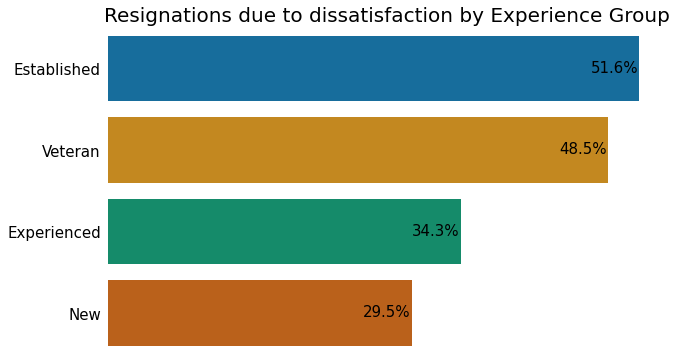

In [40]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Set a figure
fig,ax = plt.subplots(figsize=(10,6))

#Plot barplot
ax = sns.barplot(x = combined_updated["dissatisfied"], 
                 y = combined_updated["service_cat"], 
                 estimator = np.mean, ci=0, palette = "colorblind")
#Remove spines
for each_spine in ['top','bottom','left','right']:
    ax.spines[each_spine].set_visible(False)

#Customize plot
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width()*100)
    x = p.get_x()+p.get_width()
    y = p.get_y()
    ax.annotate(percentage,(x,y),
                ha='center',va='center',
                xytext = (-25, -32), 
                textcoords = 'offset points',size = 15)
ax.tick_params(bottom = False, left=False, labelbottom = False)
plt.yticks(fontsize = 15)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Resignations due to dissatisfaction by Experience Group",size = 20)
plt.show()

**Insights**
It is evident that **resignation because of dissatisfaction is highest among employees that have the most experience.** In comparison, only slightly more than 25% of new employees have resigned because of dissatisfaction in their jobs.

This could be because more established employees have far less oppurtunities outside the organization and are more sensitive to any thing that they percieve as wrong from the employer's perspective. Over time they have developed a perception of the "right way" and their experience may have cemented that perception. 
On the other hand, newer employees tend to be more flexible as they are not established and have to prove themselves.They are willing to overcome any adversity in exchange for the learning and experience.

In [41]:
len(combined_updated["dissatisfied"])

640

**Question**: How much does dissatisfaction play a role in resignation across age groups?

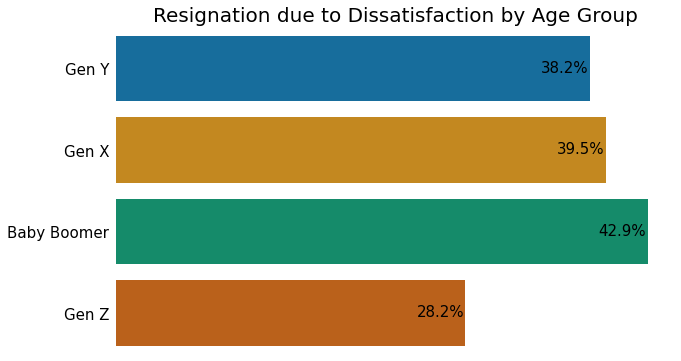

In [42]:
import seaborn as sns

#Set a figure
fig,ax = plt.subplots(figsize=(10,6))

#Plot subplot
ax = sns.barplot(y = combined_updated["age_cat"], 
                 x = combined_updated["dissatisfied"], 
                 estimator = np.mean, ci=0, palette = "colorblind")

#Remove spines
for each_spine in ['top','bottom','left','right']:
    ax.spines[each_spine].set_visible(False)

#Customizing the plot    
ax.tick_params(left = False, bottom = False)
total = len(combined_updated["dissatisfied"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width()*100)
    x = p.get_x()+p.get_width()
    y = p.get_y()
    ax.annotate(percentage,(x,y),
                ha='center',va='center',
                xytext = (-25, -32), 
                textcoords = 'offset points',size = 15)
ax.tick_params(bottom = False, left=False, labelbottom = False)
plt.yticks(fontsize = 15)
ax.set_ylabel(None)
ax.set_xlabel(None) 
ax.set_title("Resignation due to Dissatisfaction by Age Group", size = 20)
plt.show()

**Insights**
Those of the Baby Boomer generation seem to be more affected by dissatisfaction, closely followed by employees of the Gen X and Gen Y age groups.

This could be because with increase in age, there is a higher degree of focus on achieving certain goals. This includes job goals like getting to a certain positions or earning within a certain income range. Anything that slows the achievement of said goal could prove to be a cause for dissatisfaction causing employees to resign.

**Question**: Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

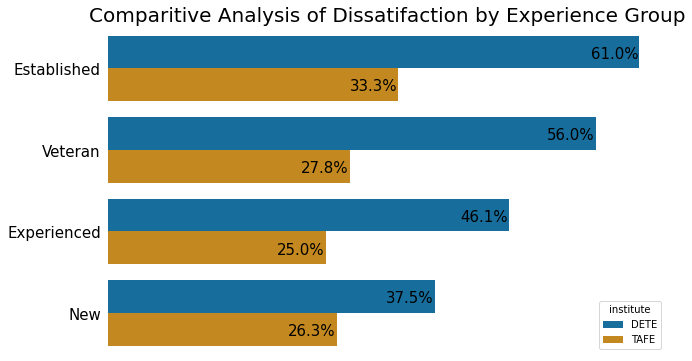

In [43]:
#Set a figure
fig,ax = plt.subplots(figsize=(10,6))

#Plot subplot
ax = sns.barplot(y = combined_updated["service_cat"], x = combined_updated["dissatisfied"], 
                 hue = combined_updated["institute"], estimator = np.mean, ci=0, palette = "colorblind")

#Remove spines
for each_spine in ['top','bottom','left','right']:
    ax.spines[each_spine].set_visible(False)

#Customizing the plot    
ax.tick_params(left = False, bottom = False)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width()*100)
    x = p.get_x()+p.get_width()
    y = p.get_y()
    ax.annotate(percentage,(x,y),
                ha='center',va='center',
                xytext = (-25, -18), 
                textcoords = 'offset points',size = 15)
ax.tick_params(bottom = False, left=False, labelbottom = False)
plt.yticks(fontsize = 15)
ax.set_ylabel(None)
ax.set_xlabel(None) 
ax.set_title("Comparitive Analysis of Dissatifaction by Experience Group",size=20)
plt.show()

**Insights**
Clearly, employees in the DETE survey have been more affected by dissatisfaction causing them to resign from their roles while in DETE employment.

The reason behind this would require a more detailed analysis of both employers and the work cultures that they have.

[Index](#Index)

# 9

## Conclusion

In this project, the focus was to analyze the responses in the DETE and TAFE surveys and understand how dissatisfaction played a role in the resignation of employees from the respective employers.

The analysis required the cleaning and reshaping of the given dataset to come up with insights regarding the role of dissatifaction across defined experience and age groups.
Employees that are older by age and those who are the most experienced tend to be affected by dissatisfaction causing them to resign. 
Those with very less experience and those who are younger seem to be comparatively less affected by dissatisfaction and may have had other reasons besides the same that cause them to resign.

[Index](#Index)

# 10

## Learnings

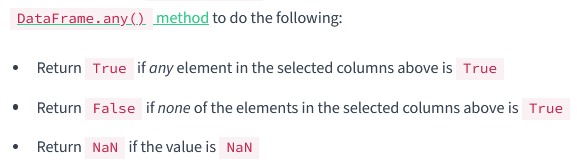

[Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.any.html)